### EDA

import necessary packages

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import sklearn
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import StandardScaler

load the data

In [65]:
train = pd.read_csv('data/Train.csv')
test = pd.read_csv('data/Test.csv')
riders = pd.read_csv('data/Riders.csv')

get a feel for the dataset, take a look at columns and data values

In [66]:
train.head().T

,0,1,2,3,4
Order No,Order_No_4211,Order_No_25375,Order_No_1899,Order_No_9336,Order_No_27883
User Id,User_Id_633,User_Id_2285,User_Id_265,User_Id_1402,User_Id_1737
Vehicle Type,Bike,Bike,Bike,Bike,Bike
Platform Type,3,3,3,3,1
Personal or Business,Business,Personal,Business,Business,Personal
Placement - Day of Month,9,12,30,15,13
Placement - Weekday (Mo = 1),5,5,2,5,1
Placement - Time,9:35:46 AM,11:16:16 AM,12:39:25 PM,9:25:34 AM,9:55:18 AM
Confirmation - Day of Month,9,12,30,15,13
Confirmation - Weekday (Mo = 1),5,5,2,5,1


In [67]:
train.shape

(21201, 29)

In [68]:
train.drop_duplicates(inplace=True)
train.shape


(21201, 29)

No duplicate rows

In [69]:
print(test.shape)
test.head().T

(7068, 25)


,0,1,2,3,4
Order No,Order_No_19248,Order_No_12736,Order_No_768,Order_No_15332,Order_No_21373
User Id,User_Id_3355,User_Id_3647,User_Id_2154,User_Id_2910,User_Id_1205
Vehicle Type,Bike,Bike,Bike,Bike,Bike
Platform Type,3,3,3,3,3
Personal or Business,Business,Business,Business,Business,Business
Placement - Day of Month,27,17,27,17,11
Placement - Weekday (Mo = 1),3,5,4,1,2
Placement - Time,4:44:10 PM,12:57:35 PM,11:08:14 AM,1:51:35 PM,11:30:28 AM
Confirmation - Day of Month,27,17,27,17,11
Confirmation - Weekday (Mo = 1),3,5,4,1,2


In [70]:
train.dtypes

Order No                                      object
User Id                                       object
Vehicle Type                                  object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)     

In [71]:
riders.head().T

,0,1,2,3,4
Rider Id,Rider_Id_396,Rider_Id_479,Rider_Id_648,Rider_Id_753,Rider_Id_335
No_Of_Orders,2946,360,1746,314,536
Age,2298,951,821,980,1113
Average_Rating,14.0,13.5,14.3,12.5,13.7
No_of_Ratings,1159,176,466,75,156


In [72]:
train['Vehicle Type'].unique()

array(['Bike'], dtype=object)

Vehicle type is bike for all rows, drop this column. Also drop columns not in
test data

In [73]:
train.drop(columns=['Vehicle Type','Arrival at Destination - Day of Month',
                        'Arrival at Destination - Weekday (Mo = 1)',
                        'Arrival at Destination - Time'], inplace=True)

checking correlation between the different day of month, weekday and time 
features with target variable

Text(0.5, 1.0, 'pickup DOM')

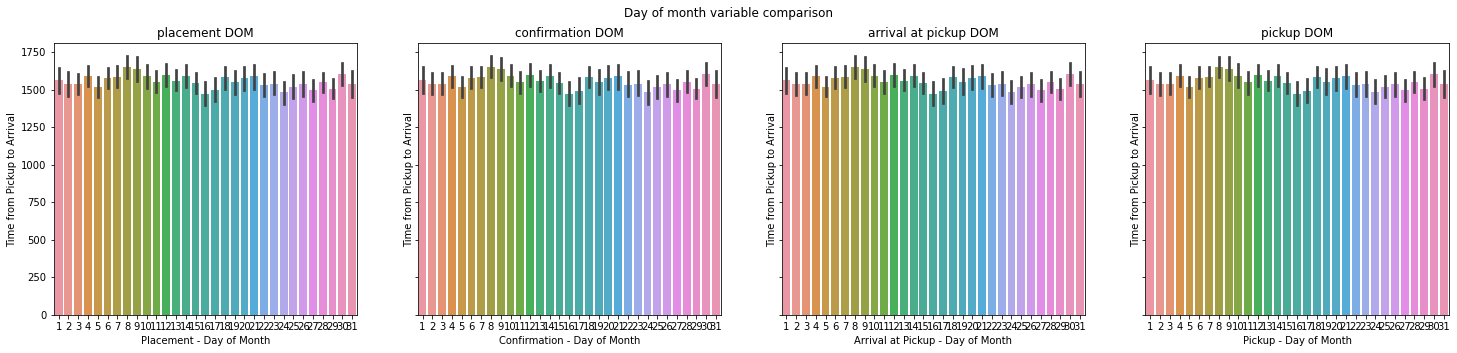

In [74]:
fig, axes = plt.subplots(1, 4, figsize=(25, 5), sharey=True)
fig.suptitle('Day of month variable comparison')


sns.barplot(ax=axes[0], data=train,x='Placement - Day of Month', y='Time from Pickup to Arrival')
axes[0].set_title('placement DOM')

sns.barplot(ax=axes[1], data=train, x='Confirmation - Day of Month', y='Time from Pickup to Arrival')
axes[1].set_title('confirmation DOM')

sns.barplot(ax=axes[2], data=train, x='Arrival at Pickup - Day of Month', y='Time from Pickup to Arrival')
axes[2].set_title('arrival at pickup DOM')

sns.barplot(ax=axes[3], data=train, x='Pickup - Day of Month', y='Time from Pickup to Arrival')
axes[3].set_title('pickup DOM')

    


Text(0.5, 1.0, 'pickup weekday')

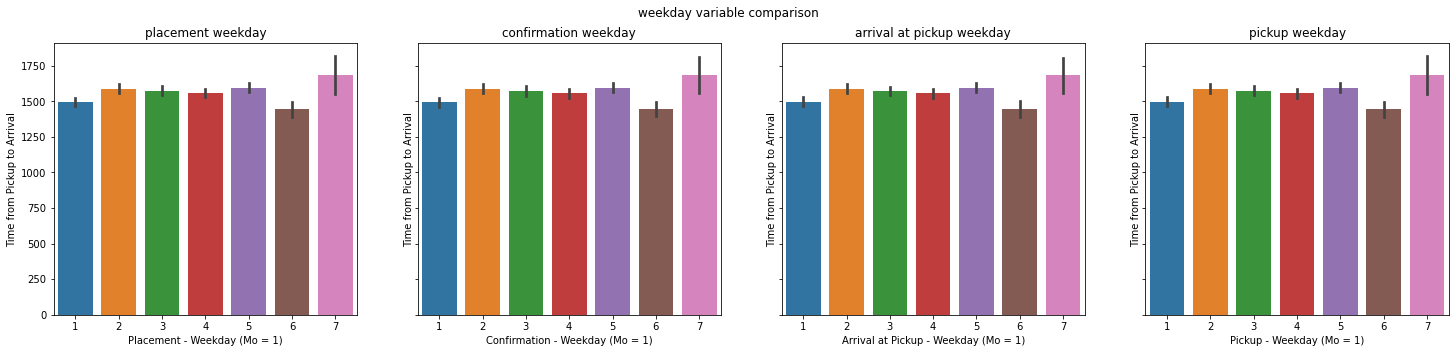

In [75]:
fig, axes = plt.subplots(1, 4, figsize=(25, 5), sharey=True)
fig.suptitle('weekday variable comparison')


sns.barplot(ax=axes[0], data=train,x='Placement - Weekday (Mo = 1)', y='Time from Pickup to Arrival')
axes[0].set_title('placement weekday')

sns.barplot(ax=axes[1], data=train, x='Confirmation - Weekday (Mo = 1)', y='Time from Pickup to Arrival')
axes[1].set_title('confirmation weekday')

sns.barplot(ax=axes[2], data=train, x='Arrival at Pickup - Weekday (Mo = 1)', y='Time from Pickup to Arrival')
axes[2].set_title('arrival at pickup weekday')

sns.barplot(ax=axes[3], data=train, x='Pickup - Weekday (Mo = 1)', y='Time from Pickup to Arrival')
axes[3].set_title('pickup weekday')

After seeing these graphs it seems that they have a very high correlation with
each other, and therefore would not add new information to aid in predicting
the duration of the ride. So we can just keep the data for 'pickup' and drop
the columns for placement,confirmation and arrival at pickup. Order number
and user ID can also be dropped since they don't correlate with the time an
order would take to drop

In [76]:
train.drop(columns=['Placement - Day of Month', 'Confirmation - Day of Month',
'Arrival at Pickup - Day of Month', 'Placement - Weekday (Mo = 1)',
'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Weekday (Mo = 1)',
'Order No', 'User Id'], 
inplace=True)

next we can check for missing values across columns and see if any columns
need to be dropped or have their values imputed

<AxesSubplot:>

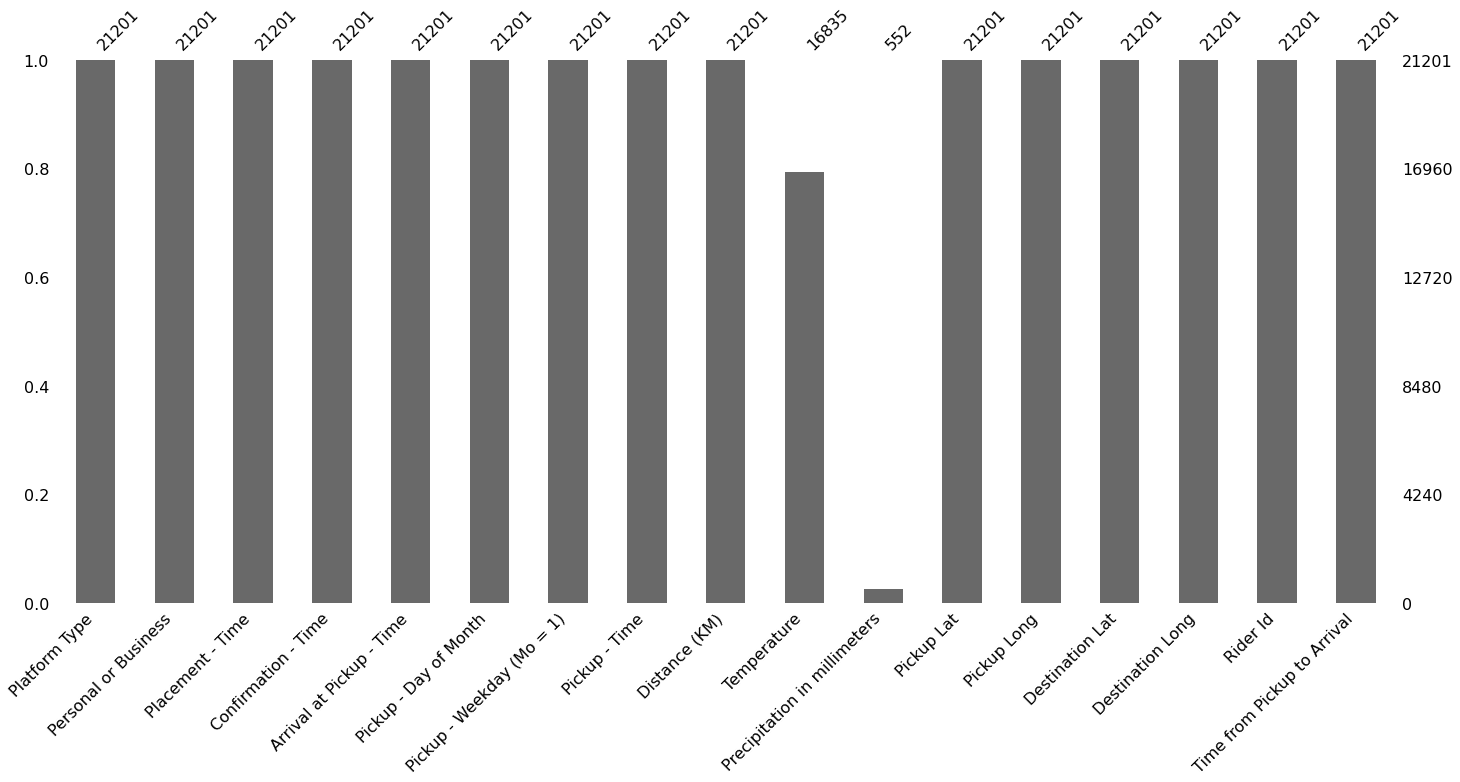

In [77]:
msno.bar(train)

we can see that precipitation has very few values and should be dropped but
temperature only has approximately 20% of it's values missing so we can impute
the missing values

In [78]:
train.drop(columns=['Precipitation in millimeters'], 
inplace=True)

def imputeMissingVals(df: pd.DataFrame, colName: str):
    """imputes the missing values for a single column and drops the original

    Args:
        df (pd.DataFrame): dataFrame
        colName (str): name of column to be dropped
    
    Returns:
        None
    """    
    imp = IterativeImputer(random_state=0)
    new_col = imp.fit_transform(df[colName].to_frame())
    df[colName] = new_col
    return

imputeMissingVals(train, 'Temperature')

Now we can observe that our dataset has no missing data

<AxesSubplot:>

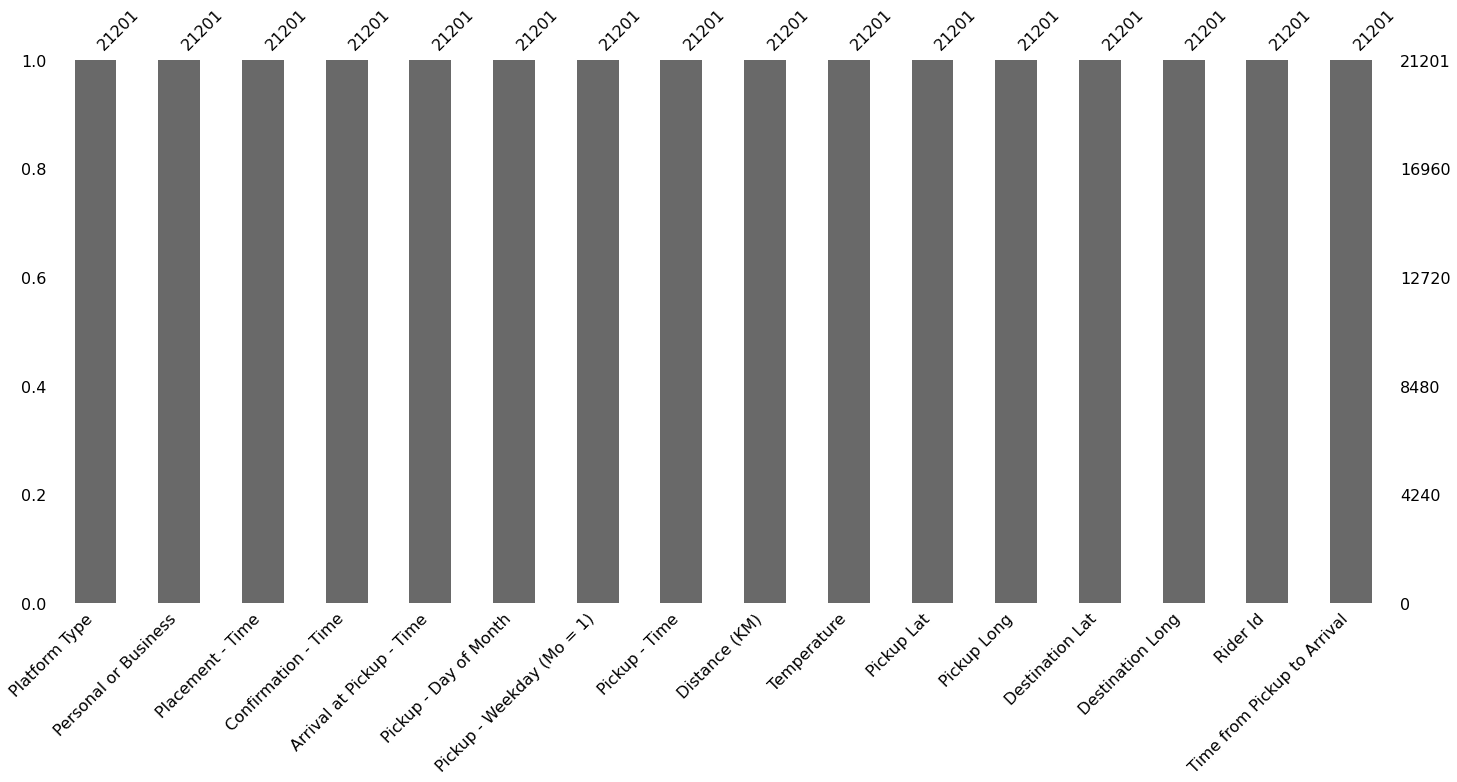

In [79]:
msno.bar(train)

next we convert the 'time' columns to pd.DateTime objects so we can work
with the data and manipulate it easier. We also rounded to the nearest hour 
since this is a categorical variable and this makes the number of categories
reasonable

In [80]:
def conv_to_time(time_cols, df):
    for time_col in time_cols:
            df[time_col] = (pd.to_datetime(df[time_col]))
            df[time_col] = df[time_col].dt.round('1H')

time_cols = ['Placement - Time', 'Confirmation - Time', 
'Arrival at Pickup - Time', 'Pickup - Time']
conv_to_time(time_cols, train)


Next we can plot the data to see any correlations

Text(0.5, 1.0, 'pickup time')

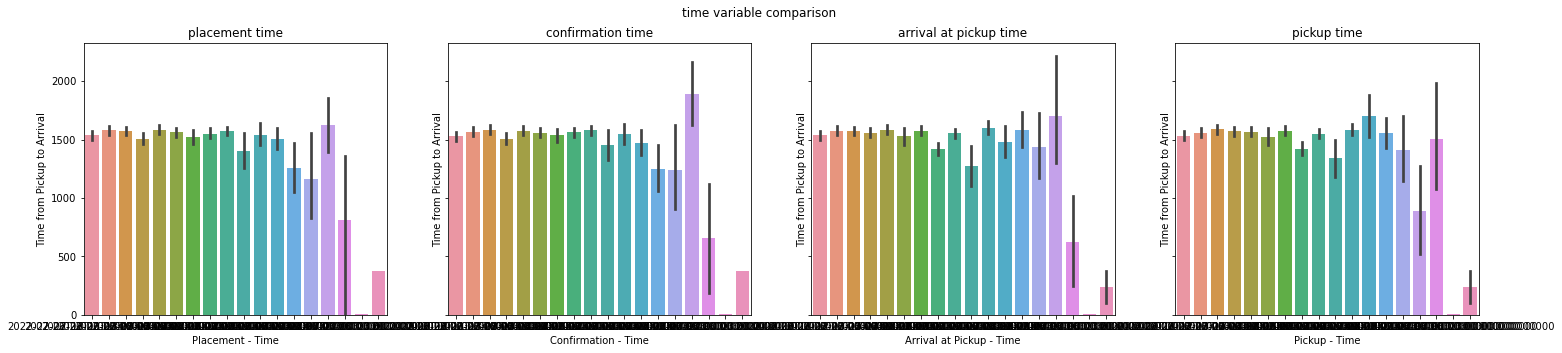

In [81]:
fig, axes = plt.subplots(1, 4, figsize=(25, 5), sharey=True)
fig.suptitle('time variable comparison')


sns.barplot(ax=axes[0], data=train,x='Placement - Time', y='Time from Pickup to Arrival')
axes[0].set_title('placement time')

sns.barplot(ax=axes[1], data=train, x='Confirmation - Time', y='Time from Pickup to Arrival')
axes[1].set_title('confirmation time')

sns.barplot(ax=axes[2], data=train, x='Arrival at Pickup - Time', y='Time from Pickup to Arrival')
axes[2].set_title('arrival at pickup time')

sns.barplot(ax=axes[3], data=train, x='Pickup - Time', y='Time from Pickup to Arrival')
axes[3].set_title('pickup time')

since the target variable we're trying to predict is the time from pickup to 
arrival it makes the most sense to keep just the time data for pickup, also
since these are categorical variables, each of these columns would add around
18 features to our model, and since the training dataset isn't that big, 
overfitting is a concern.

In [82]:
train.drop(columns=['Placement - Time','Confirmation - Time',
'Arrival at Pickup - Time'], 
inplace=True)

The features we are left with now are:

In [83]:
train.columns

Index(['Platform Type', 'Personal or Business', 'Pickup - Day of Month',
       'Pickup - Weekday (Mo = 1)', 'Pickup - Time', 'Distance (KM)',
       'Temperature', 'Pickup Lat', 'Pickup Long', 'Destination Lat',
       'Destination Long', 'Rider Id', 'Time from Pickup to Arrival'],
      dtype='object')

Except for the time column, we can see the correlations of the different 
features on the heatmap below

<AxesSubplot:>

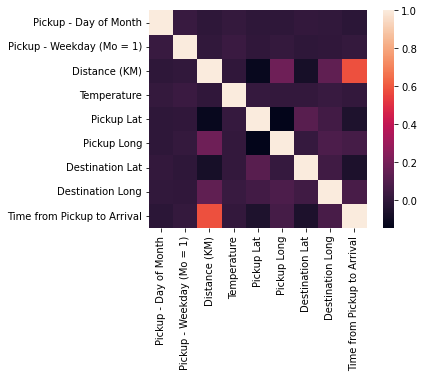

In [84]:
sns.heatmap(train[['Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)',
'Distance (KM)', 'Temperature', 'Pickup Lat', 'Pickup Long',
'Destination Lat', 'Destination Long','Time from Pickup to Arrival']].corr(), square=True)

It seems that the only cell with a high correlation to the output is distance.
So engineering some features which would make it easier for the model to learn
correlations is important here

The first feature we chose to add is a time of day feature which is a 
categorical variable that places an order into one of four categories:
morning, afternoon, evening, night based on the pickup time

The second feature just categorizes an order as a weekend or weekday delivery

In [85]:
def FENG_weekend(df: pd.DataFrame):
    """creates a column specifiying if pickup was on a weekend or not

    Args:
        df (pd.DataFrame): dataframe
    
    Returns:
        df
    """     
    df['weekend'] = df['Pickup - Weekday (Mo = 1)'] >= 6
    return df

def FENG_TODcol(df: pd.DataFrame):
    """adds a column which specifies the time of day of pick up from one of four
    categories: morning, afternoon, evening, night

    Args:
        df (pd.DataFrame): dataframe

    Returns:
        df

    """       
    conditions = [
   (df['Pickup - Time'] >= pd.to_datetime('05:00:00')) & (df['Pickup - Time'] <= pd.to_datetime('11:59:00')),
   (df['Pickup - Time'] >= pd.to_datetime('12:00:00')) & (df['Pickup - Time'] <= pd.to_datetime('17:59:00')),
   (df['Pickup - Time'] >= pd.to_datetime('18:00:00')) & (df['Pickup - Time'] <= pd.to_datetime('19:59:00')),
   (df['Pickup - Time'] >= pd.to_datetime('20:00:00')) | (df['Pickup - Time'] <= pd.to_datetime('4:59:00')),
   ]

    values = ['morning','afternoon','evening','night']

    df['TOD'] = np.select(conditions, values)
    return df

train = FENG_TODcol(train)
train = FENG_weekend(train)

train.columns


Index(['Platform Type', 'Personal or Business', 'Pickup - Day of Month',
       'Pickup - Weekday (Mo = 1)', 'Pickup - Time', 'Distance (KM)',
       'Temperature', 'Pickup Lat', 'Pickup Long', 'Destination Lat',
       'Destination Long', 'Rider Id', 'Time from Pickup to Arrival', 'TOD',
       'weekend'],
      dtype='object')

Text(0.5, 1.0, 'time of day')

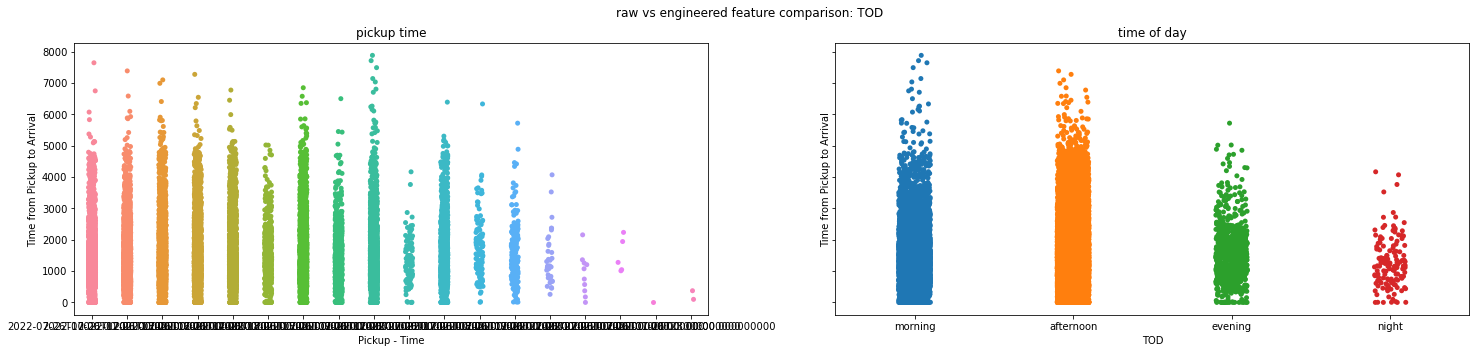

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(25, 5), sharey=True)
fig.suptitle('raw vs engineered feature comparison: TOD')
sns.stripplot(ax=axes[0], data=train,x='Pickup - Time', y='Time from Pickup to Arrival')
axes[0].set_title('pickup time')

sns.stripplot(ax=axes[1], data=train, x='TOD', y='Time from Pickup to Arrival')
axes[1].set_title('time of day')

Text(0.5, 1.0, 'time of day')

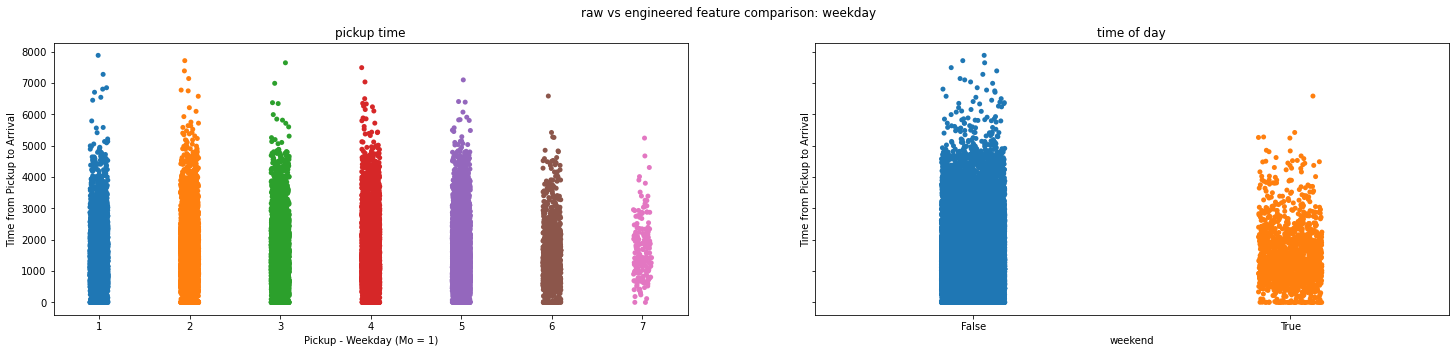

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(25, 5), sharey=True)
fig.suptitle('raw vs engineered feature comparison: weekday')
sns.stripplot(ax=axes[0], data=train,x='Pickup - Weekday (Mo = 1)', y='Time from Pickup to Arrival')
axes[0].set_title('pickup time')

sns.stripplot(ax=axes[1], data=train, x='weekend', y='Time from Pickup to Arrival')
axes[1].set_title('time of day')

now we can merge in our rider data and see how it correlates with our target 
variable

In [88]:
merged_train = pd.merge(train,riders,on="Rider Id")
merged_train.columns


Index(['Platform Type', 'Personal or Business', 'Pickup - Day of Month',
       'Pickup - Weekday (Mo = 1)', 'Pickup - Time', 'Distance (KM)',
       'Temperature', 'Pickup Lat', 'Pickup Long', 'Destination Lat',
       'Destination Long', 'Rider Id', 'Time from Pickup to Arrival', 'TOD',
       'weekend', 'No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings'],
      dtype='object')

<AxesSubplot:>

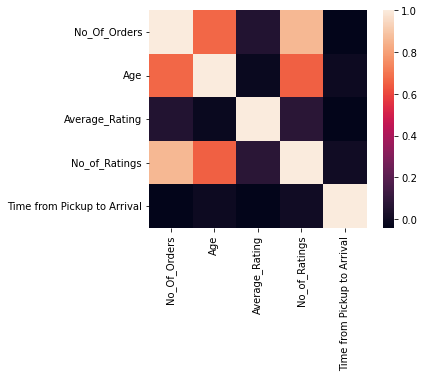

In [89]:
sns.heatmap(merged_train[['No_Of_Orders', 'Age',
       'Average_Rating', 'No_of_Ratings', 'Time from Pickup to Arrival']].corr(), square=True)